In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_excel('premiums_young.xlsx')

In [6]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [7]:
df.shape

(20096, 13)

In [8]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [9]:
df.columns.str.replace(' ','_').str.lower()

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [11]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

### Handling NA values

In [12]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [15]:
df.shape

(20090, 13)

### Handling duplicate values

In [16]:
df.duplicated().sum()

0

In [17]:
df  = df.drop_duplicates()

In [18]:
df.duplicated().value_counts()

False    20090
Name: count, dtype: int64

In [19]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [20]:
df[df['number_of_dependants']<0].shape

(22, 13)

In [21]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [22]:
### it seems like by mistake they were marked as negative but should have been positive

In [23]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [24]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

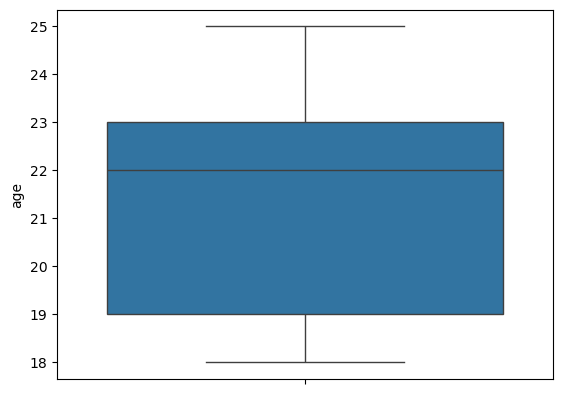

In [26]:
sns.boxplot(df['age'])
plt.show()

In [27]:
num_columns = df.select_dtypes(include = np.number).columns

In [28]:
num_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

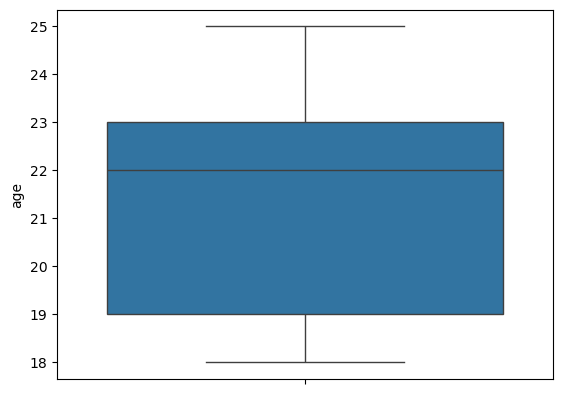

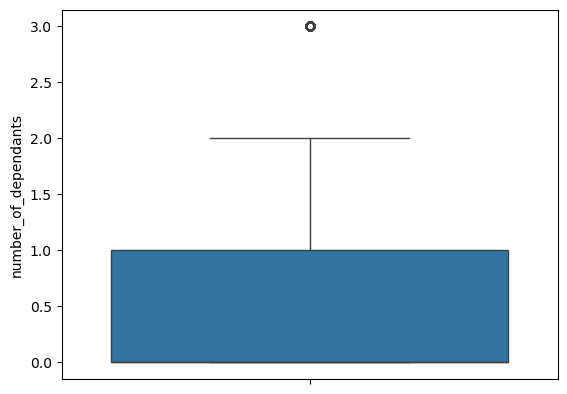

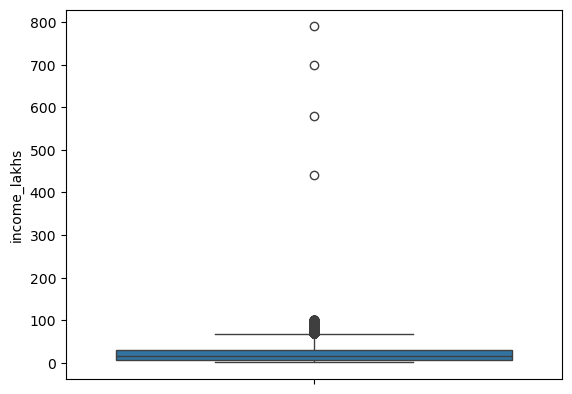

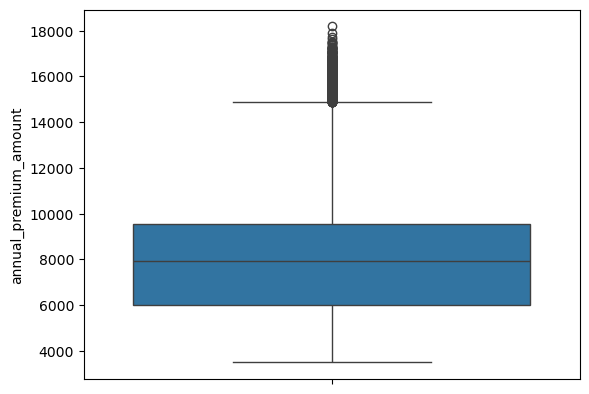

In [29]:
for col in num_columns:
    sns.boxplot(df[col])
    plt.show()

In [30]:
# with common knowledge and discussion with business we can take 100 as a threshold for age

In [31]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [32]:
df1 = df[df['age'] <= 100].copy()

In [33]:
df1.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [34]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

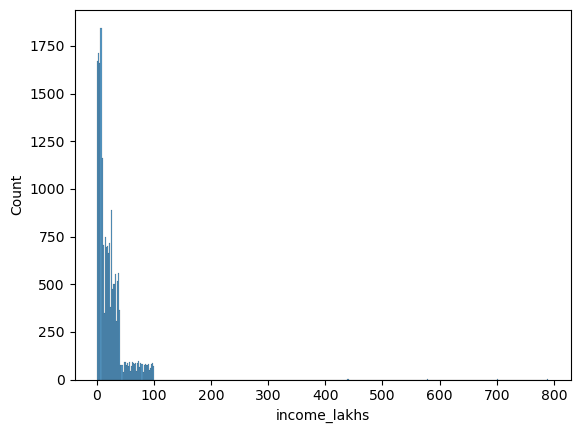

In [35]:
sns.histplot(df1['income_lakhs'])

In [36]:
df['income_lakhs'].quantile(.50)

16.0

In [37]:
def get_iqr_bounds(data,col):
    q1,q3 = data[col].quantile([.25,.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5* iqr
    return lower_bound,upper_bound

In [38]:
get_iqr_bounds(df1,'income_lakhs')

(-31.5, 68.5)

In [39]:
df1['income_lakhs'].quantile(.999)

100.0

In [40]:
# it is not necessary to use iqr always, discuss with business and try to find a good threshold, here after discussing with business 100 seemed fine


In [41]:
df1[df1['income_lakhs']>100]['income_lakhs'].shape

(4,)

In [42]:
# only 10 are there, so we can safely remove them

In [43]:
df2 = df1[df1['income_lakhs']<= 100].copy()

<Axes: xlabel='income_lakhs', ylabel='Count'>

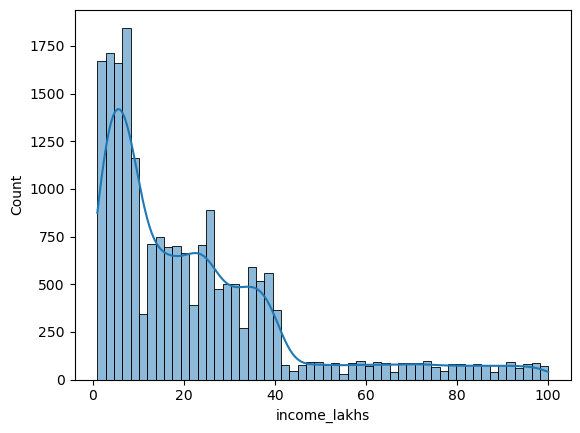

In [44]:
sns.histplot(df2['income_lakhs'],kde = True)

In [45]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263
std,2.294248,0.937238,21.732062,2749.912486
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.000000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,100.000000,18186.000000


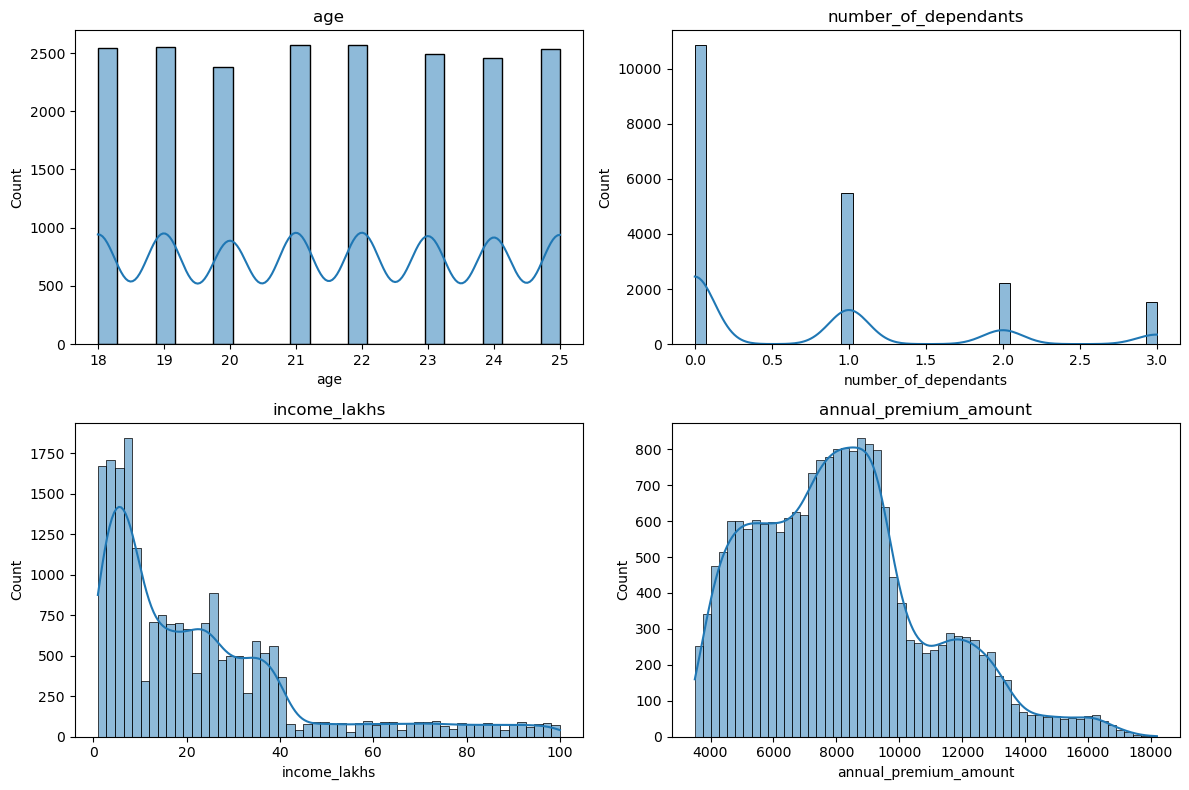

In [46]:
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes = axes.flatten()
for i,col in enumerate(num_columns):
    ax = axes[i]
    sns.histplot(df2[col],kde = True, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

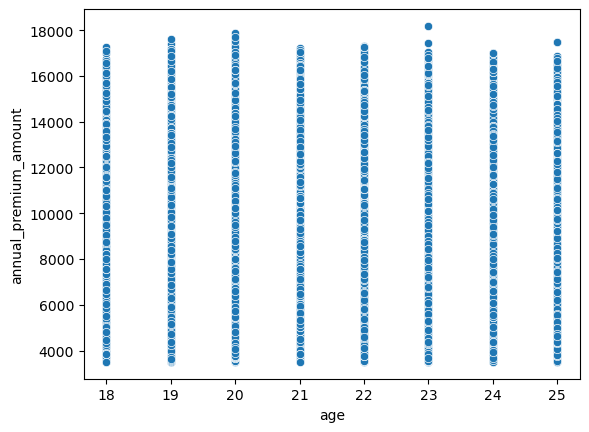

In [47]:
sns.scatterplot(data = df2, x = 'age', y = 'annual_premium_amount')

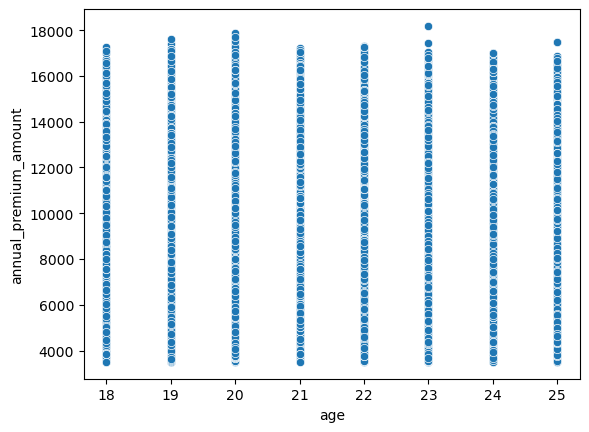

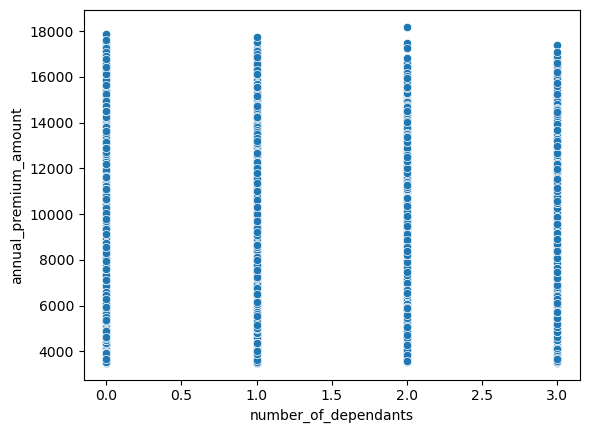

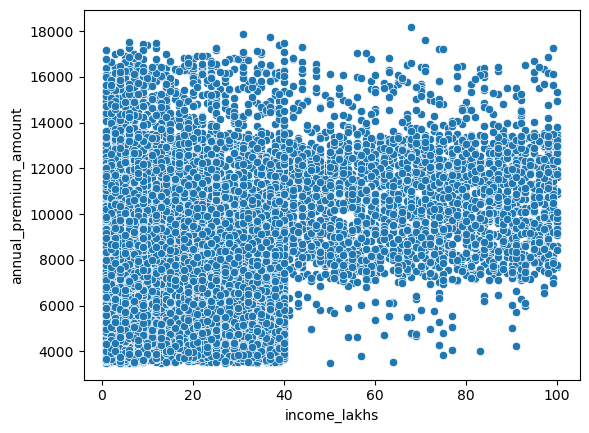

In [48]:
for i in num_columns.drop('annual_premium_amount'):
    sns.scatterplot(data = df2, y = 'annual_premium_amount', x = i)
    plt.show()

In [49]:
cat_columns = df2.select_dtypes(exclude = 'number').columns
cat_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [50]:
for i in cat_columns:
    print(f'{i}: {df2[i].unique()}')

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


In [51]:
## the smoking status has wrong values lets replace them

In [52]:
smoke = {'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking','Not Smoking':'No Smoking' }
df2['smoking_status'] = df2['smoking_status'].replace(smoke)

In [53]:
for i in cat_columns:
    print(f'{i} : {df2[i].unique()}')

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [54]:
cat_columns.shape

(9,)

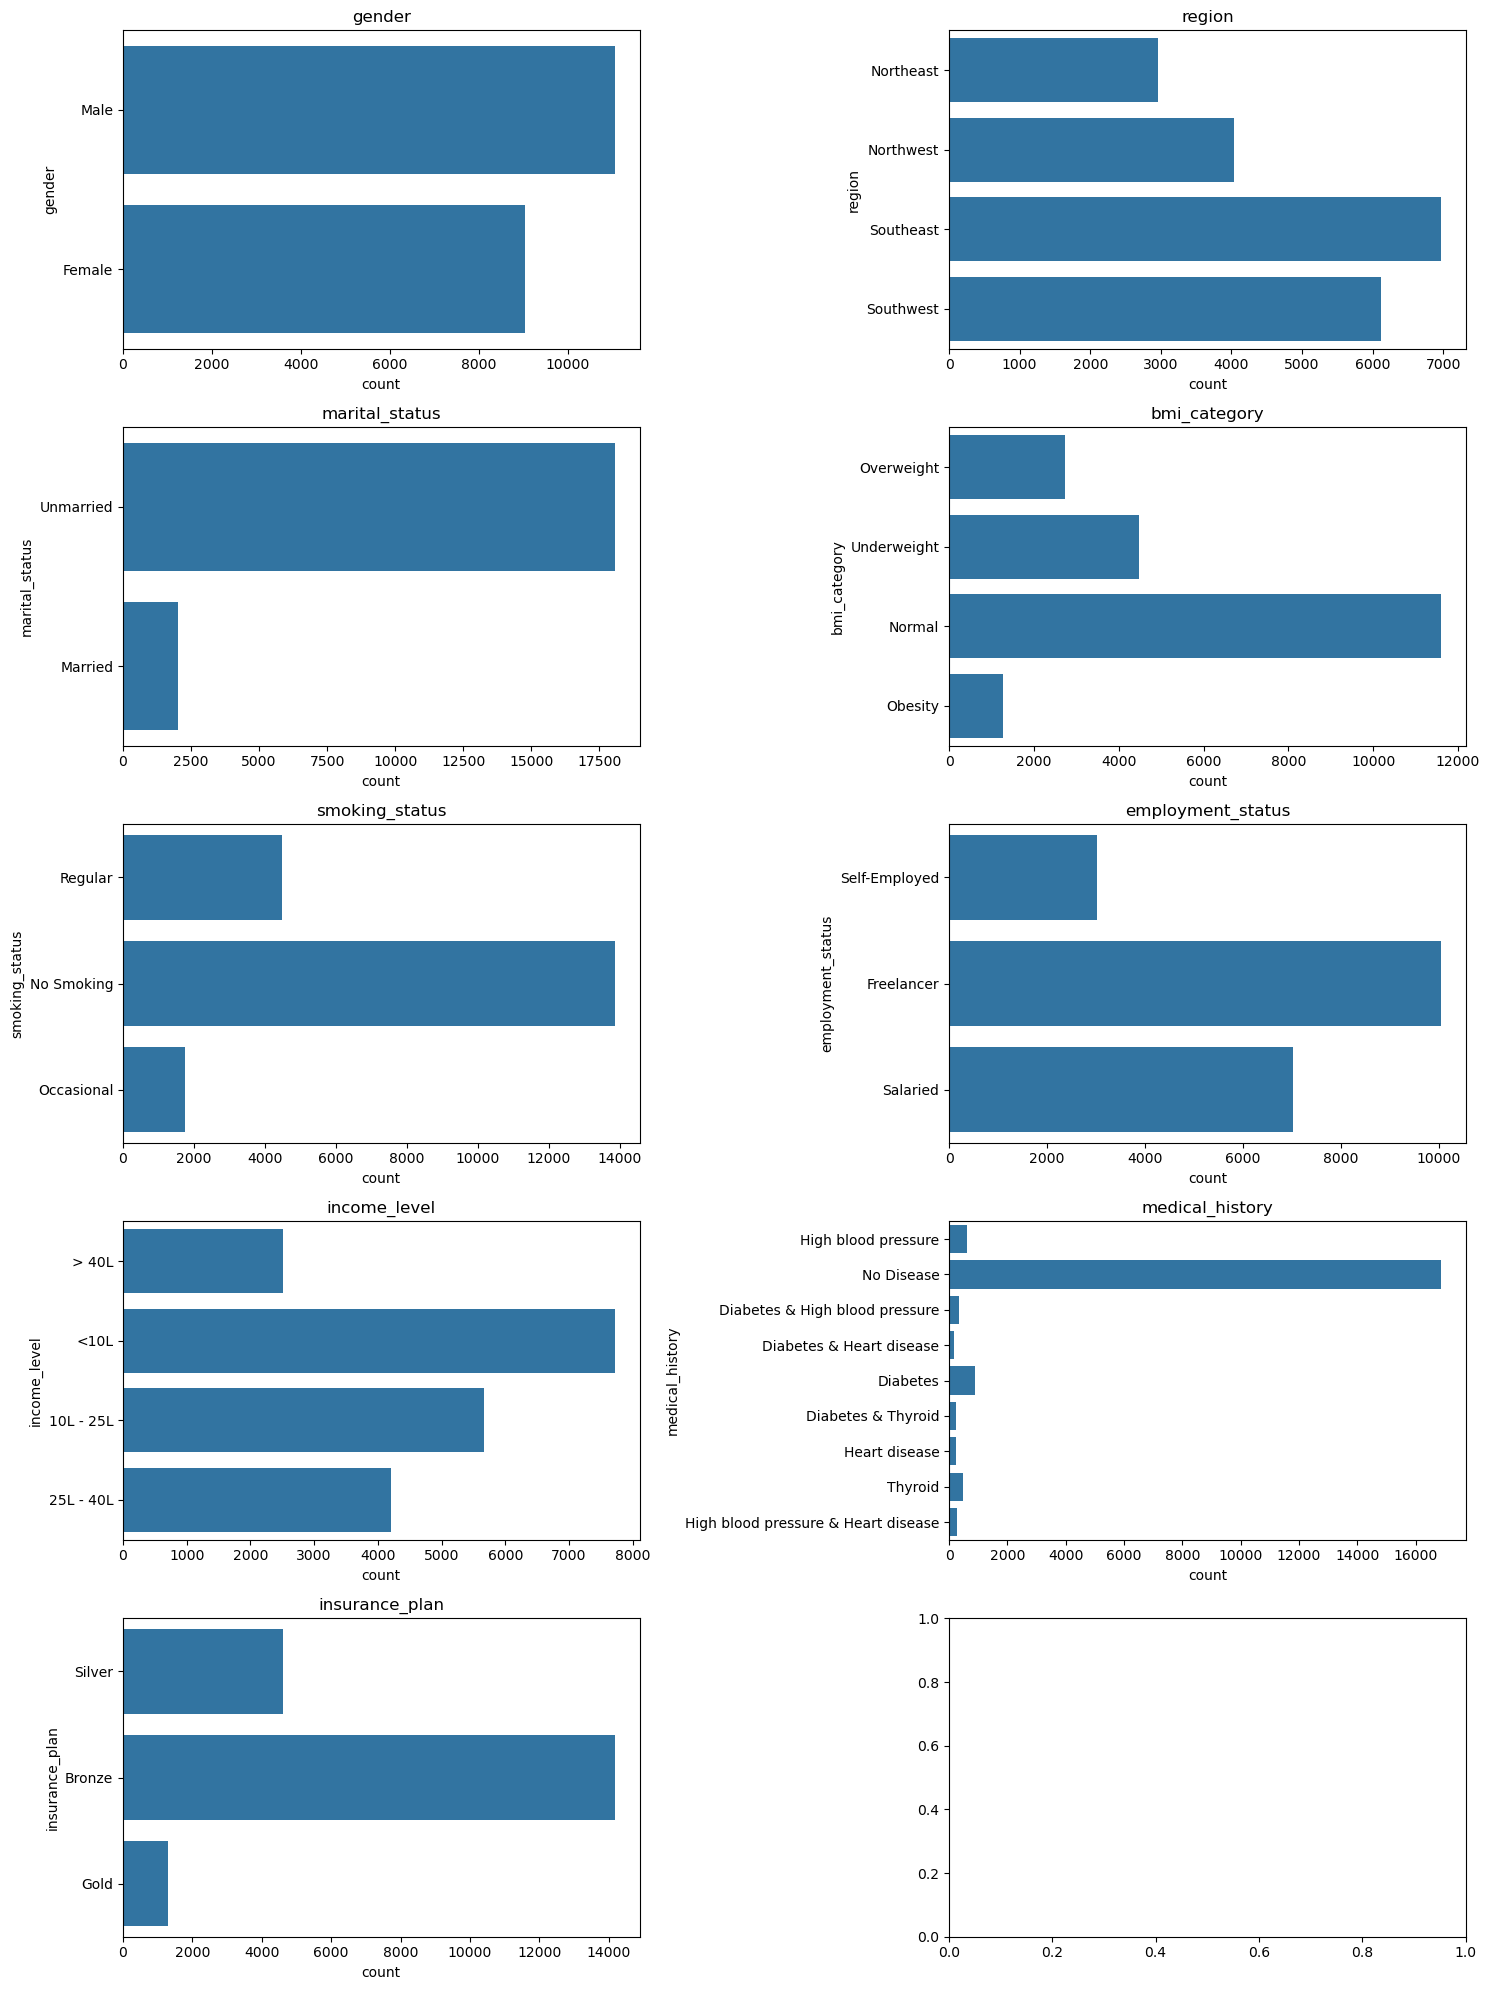

In [55]:
fig, axes = plt.subplots(5,2,figsize = (15,20))
for i,col in enumerate(cat_columns):
    ax = axes[i//2,i%2]
    sns.countplot(df2[col],ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

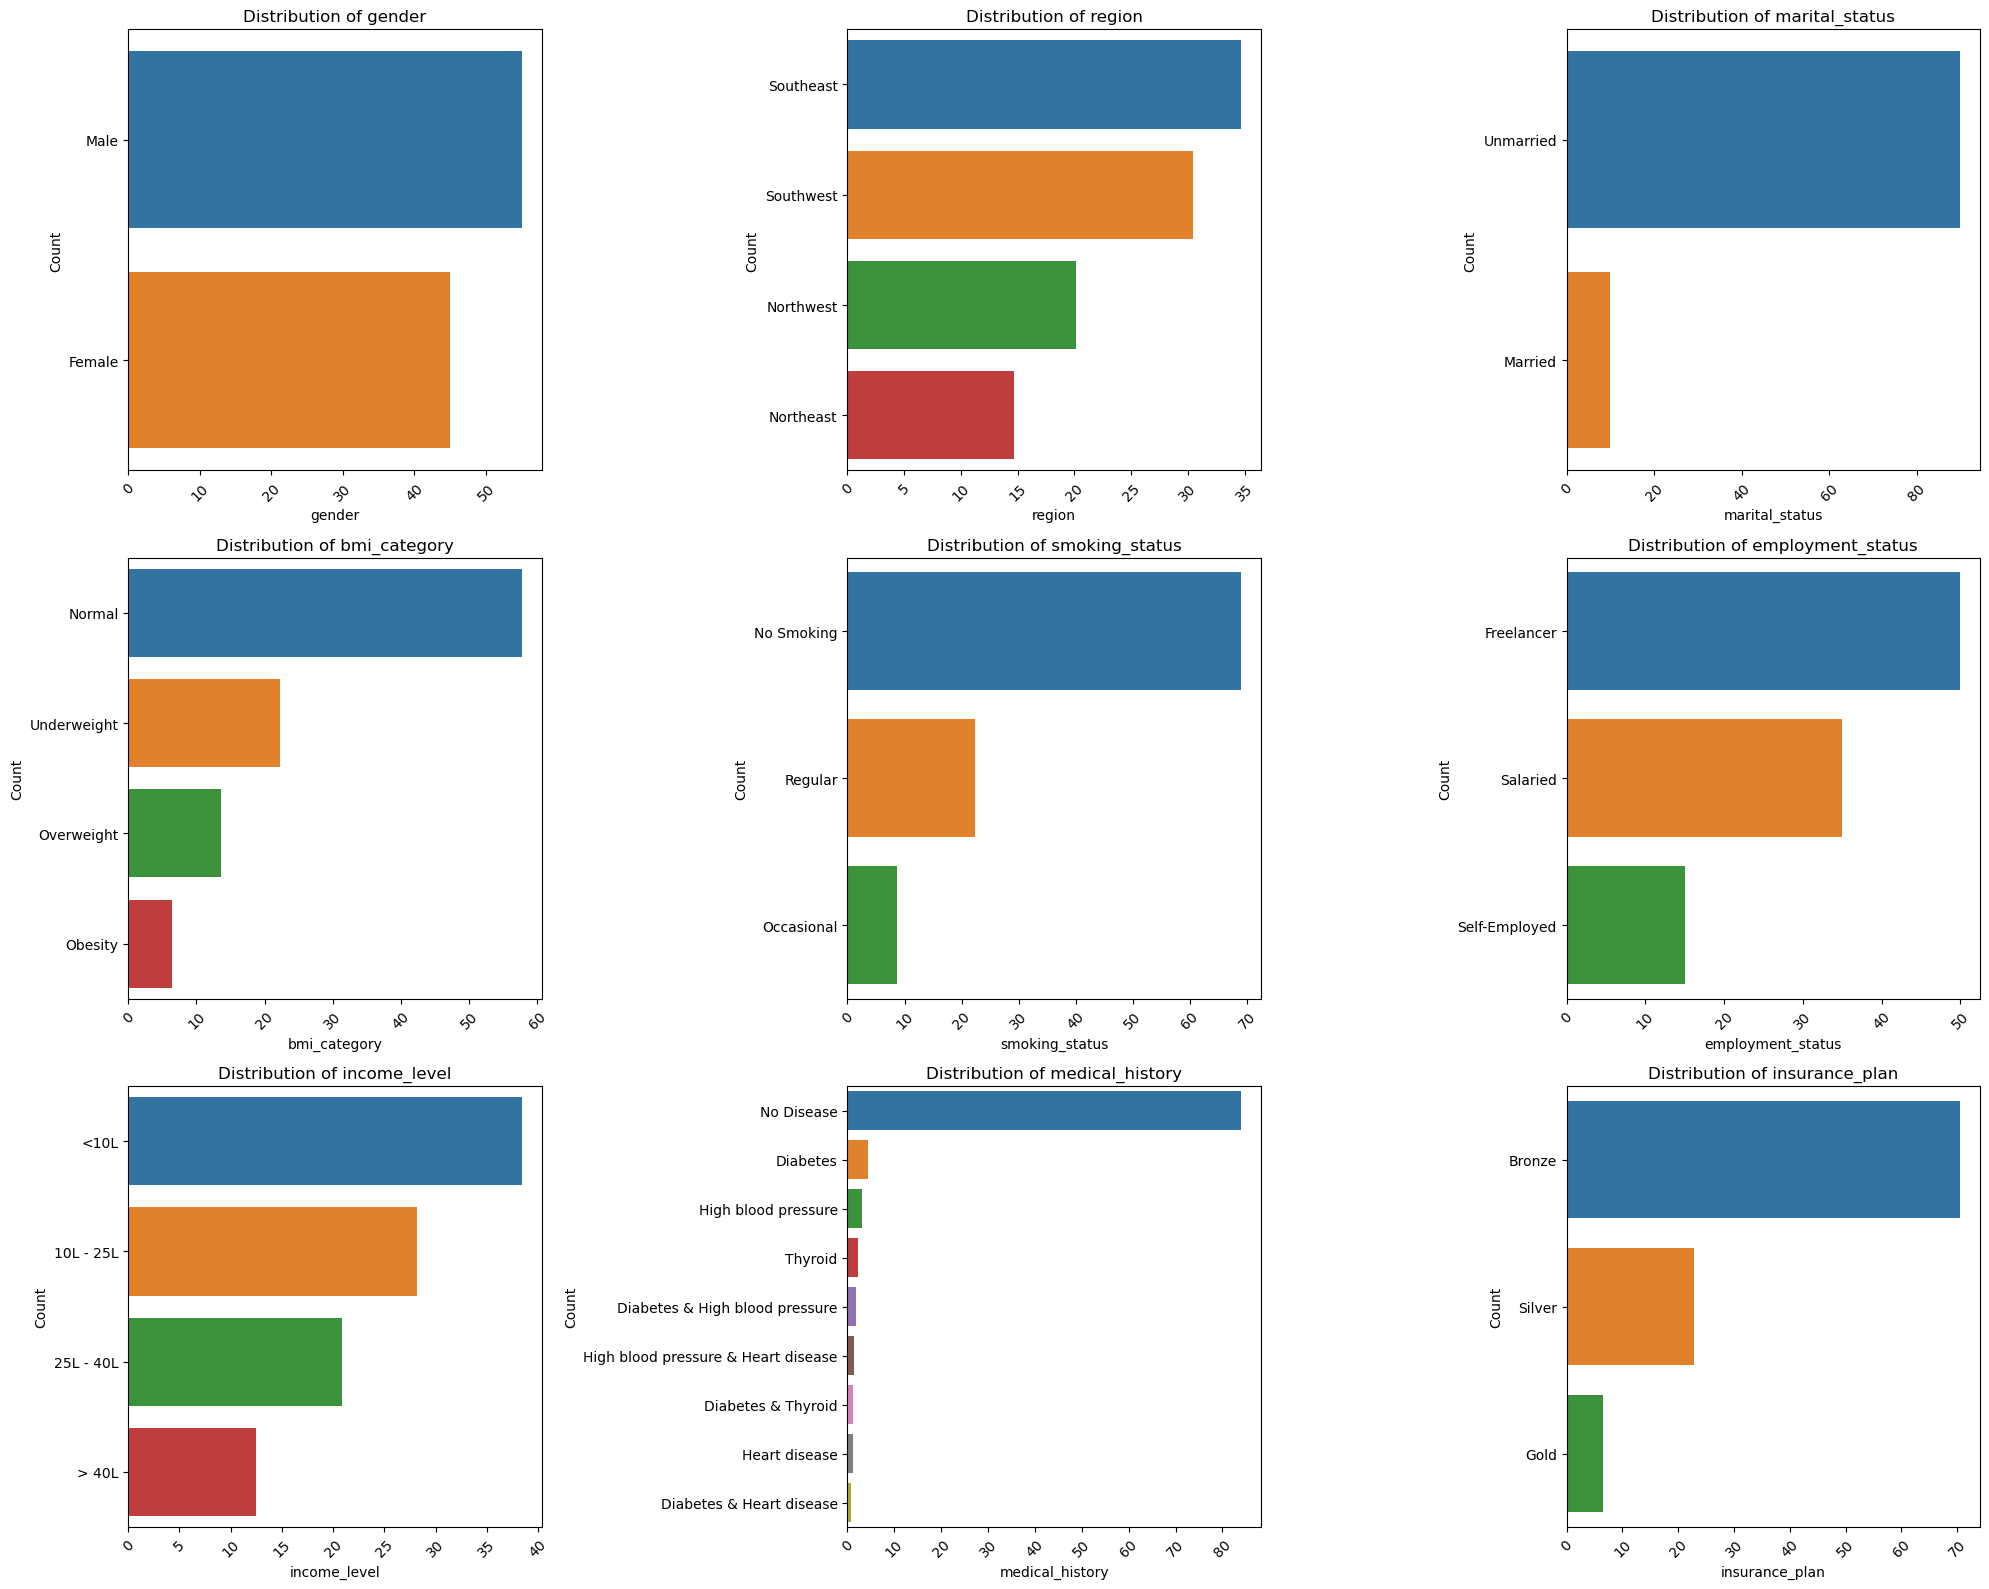

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 grid (since 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()  # Flatten to simplify indexing

for i, col in enumerate(cat_columns):
    ax = axes[i]
    
    # Sort categories by count
    sorted_counts = (df2[col].value_counts(normalize = True)*100).sort_values(ascending=False)
    
    # Plot with sorted order
    sns.barplot(y=sorted_counts.index, x=sorted_counts.values,hue = sorted_counts.index, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [57]:
cross = pd.crosstab(df2['income_level'],df2['insurance_plan'])
cross

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


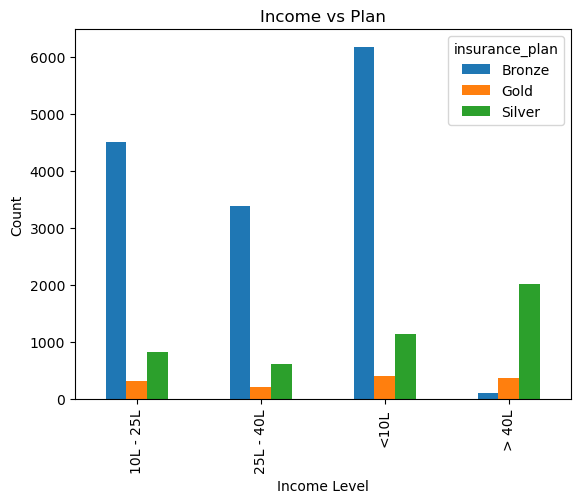

In [58]:
cross.plot(kind = 'bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.xlabel('Income Level')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

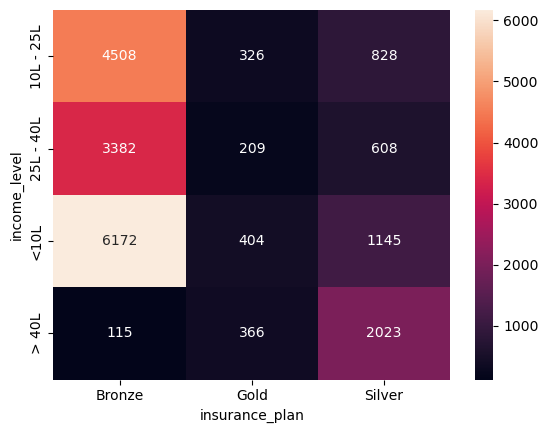

In [59]:
sns.heatmap(cross, annot = True, fmt = 'd')

In [60]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [61]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [62]:
# we want to score each disease and create one disease score for each patient
# based on discussion with business, below list of risk scores was finalised

In [63]:
risk_scores = {'diabetes':6, 'heart disease':8, 'high blood pressure':6,'thyroid':5, 'no disease':0,'none':0}

In [64]:
df2['med_new'] = df2['medical_history'].str.lower().str.split('&')

In [65]:
df2['med_new'] = df2['med_new'].apply(lambda lst: [i.strip() for i in lst])

In [66]:
print(df2['med_new'].sample(5))

4455                  [no disease]
11461    [diabetes, heart disease]
3594         [high blood pressure]
17766                 [no disease]
11537                 [no disease]
Name: med_new, dtype: object


In [67]:
def tot_risk_score(lst):
    tot = 0
    for i in lst:
        tot += risk_scores[i]
    return tot

In [68]:
df2['med_new'].head()

0    [high blood pressure]
1             [no disease]
2             [no disease]
3             [no disease]
4             [no disease]
Name: med_new, dtype: object

In [69]:
df2['total_risk_score'] = df2['med_new'].apply(tot_risk_score)

In [70]:
df2.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,med_new,total_risk_score
6315,20,Female,Northeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,5,No Disease,Bronze,5935,[no disease],0
6641,24,Male,Southwest,Unmarried,1,Normal,No Smoking,Freelancer,> 40L,40,No Disease,Silver,7962,[no disease],0
15712,23,Female,Northwest,Unmarried,1,Obesity,No Smoking,Salaried,10L - 25L,23,No Disease,Bronze,7955,[no disease],0
14330,25,Female,Northeast,Unmarried,0,Underweight,Regular,Freelancer,10L - 25L,24,No Disease,Bronze,5933,[no disease],0
19689,22,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,<10L,8,No Disease,Silver,9908,[no disease],0
6371,24,Female,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,17,No Disease,Bronze,6188,[no disease],0
1371,21,Male,Southeast,Unmarried,1,Overweight,No Smoking,Salaried,25L - 40L,39,No Disease,Bronze,4853,[no disease],0
8571,23,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,7,No Disease,Bronze,8017,[no disease],0
17713,20,Male,Northwest,Unmarried,1,Normal,No Smoking,Salaried,> 40L,46,No Disease,Silver,12042,[no disease],0
13707,20,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,25L - 40L,30,No Disease,Bronze,9338,[no disease],0


In [71]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,total_risk_score
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,1.289057
std,2.294248,0.937238,21.732062,2749.912486,3.220220
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,0.000000
50%,22.000000,0.000000,16.000000,7939.000000,0.000000
75%,23.000000,1.000000,31.000000,9561.000000,0.000000
max,25.000000,3.000000,100.000000,18186.000000,14.000000


In [72]:
max_risk = df2['total_risk_score'].max()
min_risk = df2['total_risk_score'].min()

In [73]:
df2['norm_risk_score'] = (df2['total_risk_score'] - min_risk)/(max_risk - min_risk)

In [74]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,med_new,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,[high blood pressure],6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,[no disease],0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,[no disease],0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,[no disease],0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,[no disease],0,0.000000


In [75]:
df2 = df2.drop(columns = 'med_new')

In [76]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,0,0.000000


In [77]:
# now lets move to insurance plan

In [78]:
df2['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [79]:
plans = {'Bronze':1, 'Silver':2, 'Gold':3}

In [80]:
df2['insurance_plan'] = df2['insurance_plan'].map(plans)

In [81]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,0,0.000000


In [82]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [83]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4 })

In [84]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,0,0.000000


In [85]:
df2.dtypes

age                        int64
gender                    object
region                    object
marital_status            object
number_of_dependants       int64
bmi_category              object
smoking_status            object
employment_status         object
income_level               int64
income_lakhs               int64
medical_history           object
insurance_plan             int64
annual_premium_amount      int64
total_risk_score           int64
norm_risk_score          float64
dtype: object

In [86]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'total_risk_score', 'norm_risk_score'],
      dtype='object')

In [87]:
df2.select_dtypes(exclude = 'number').columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'medical_history'],
      dtype='object')

In [88]:
col_for_hot_enc = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']

In [89]:
df3 = pd.get_dummies(df2, columns = col_for_hot_enc, drop_first = True,dtype = int).copy()

In [90]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,6,0.428571,1,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,0,0.000000,0,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,0,0.000000,0,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,0,0.000000,1,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,0,0.000000,1,...,1,0,1,0,1,0,0,0,0,0


In [91]:
df3 = df3.drop(columns = ['medical_history','total_risk_score'])

In [92]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [93]:
cm = df3.corr()
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,0.003096,-0.010634,-0.016671,-0.018195,-0.010815,0.003074,0.007791,0.002698,-0.003419,0.006922,0.000389,-0.001597,0.022006,-0.003068,-0.011040,-0.009827,-0.009493,0.001680
number_of_dependants,0.003096,1.000000,-0.014268,-0.014835,0.007802,0.005909,0.044009,-0.008213,0.014965,-0.000088,-0.011166,-0.722696,0.004090,0.002822,-0.000630,-0.015309,-0.001891,-0.013320,0.010281
income_level,-0.010634,-0.014268,1.000000,0.908131,0.322278,0.244373,-0.005214,0.026991,-0.003467,-0.003369,0.011454,0.012376,0.011474,0.013096,-0.003746,0.006059,0.000315,-0.111361,0.103160
income_lakhs,-0.016671,-0.014835,0.908131,1.000000,0.380968,0.290683,-0.006630,0.000951,-0.006349,-0.004859,0.015674,0.014021,0.014379,0.008312,-0.000598,0.006187,-0.010641,-0.084416,0.083316
insurance_plan,-0.018195,0.007802,0.322278,0.380968,1.000000,0.761004,0.001951,-0.016589,-0.006221,-0.007836,0.013644,-0.006561,0.002285,-0.006236,0.007766,-0.001517,-0.008755,-0.016911,0.026543
annual_premium_amount,-0.010815,0.005909,0.244373,0.290683,0.761004,1.000000,0.090702,0.000251,-0.017573,0.002388,0.008090,-0.008706,0.064828,0.036573,0.004972,0.008673,0.085407,-0.015318,0.024136
norm_risk_score,0.003074,0.044009,-0.005214,-0.006630,0.001951,0.090702,1.000000,-0.000234,-0.000102,-0.008037,-0.004214,-0.056335,0.001278,0.000108,-0.010735,-0.008724,0.003557,-0.005101,-0.002150
gender_Male,0.007791,-0.008213,0.026991,0.000951,-0.016589,0.000251,-0.000234,1.000000,-0.002796,-0.000131,-0.002445,0.009276,-0.061257,0.043389,-0.060075,0.053469,0.202788,0.006978,-0.001052
region_Northwest,0.002698,0.014965,-0.003467,-0.006349,-0.006221,-0.017573,-0.000102,-0.002796,1.000000,-0.365912,-0.332236,-0.009604,-0.010099,0.003283,0.003720,-0.000543,-0.002375,0.010613,0.000254
region_Southeast,-0.003419,-0.000088,-0.003369,-0.004859,-0.007836,0.002388,-0.008037,-0.000131,-0.365912,1.000000,-0.482398,0.000952,0.004409,0.010248,0.001118,-0.006319,-0.001805,-0.004268,0.000575


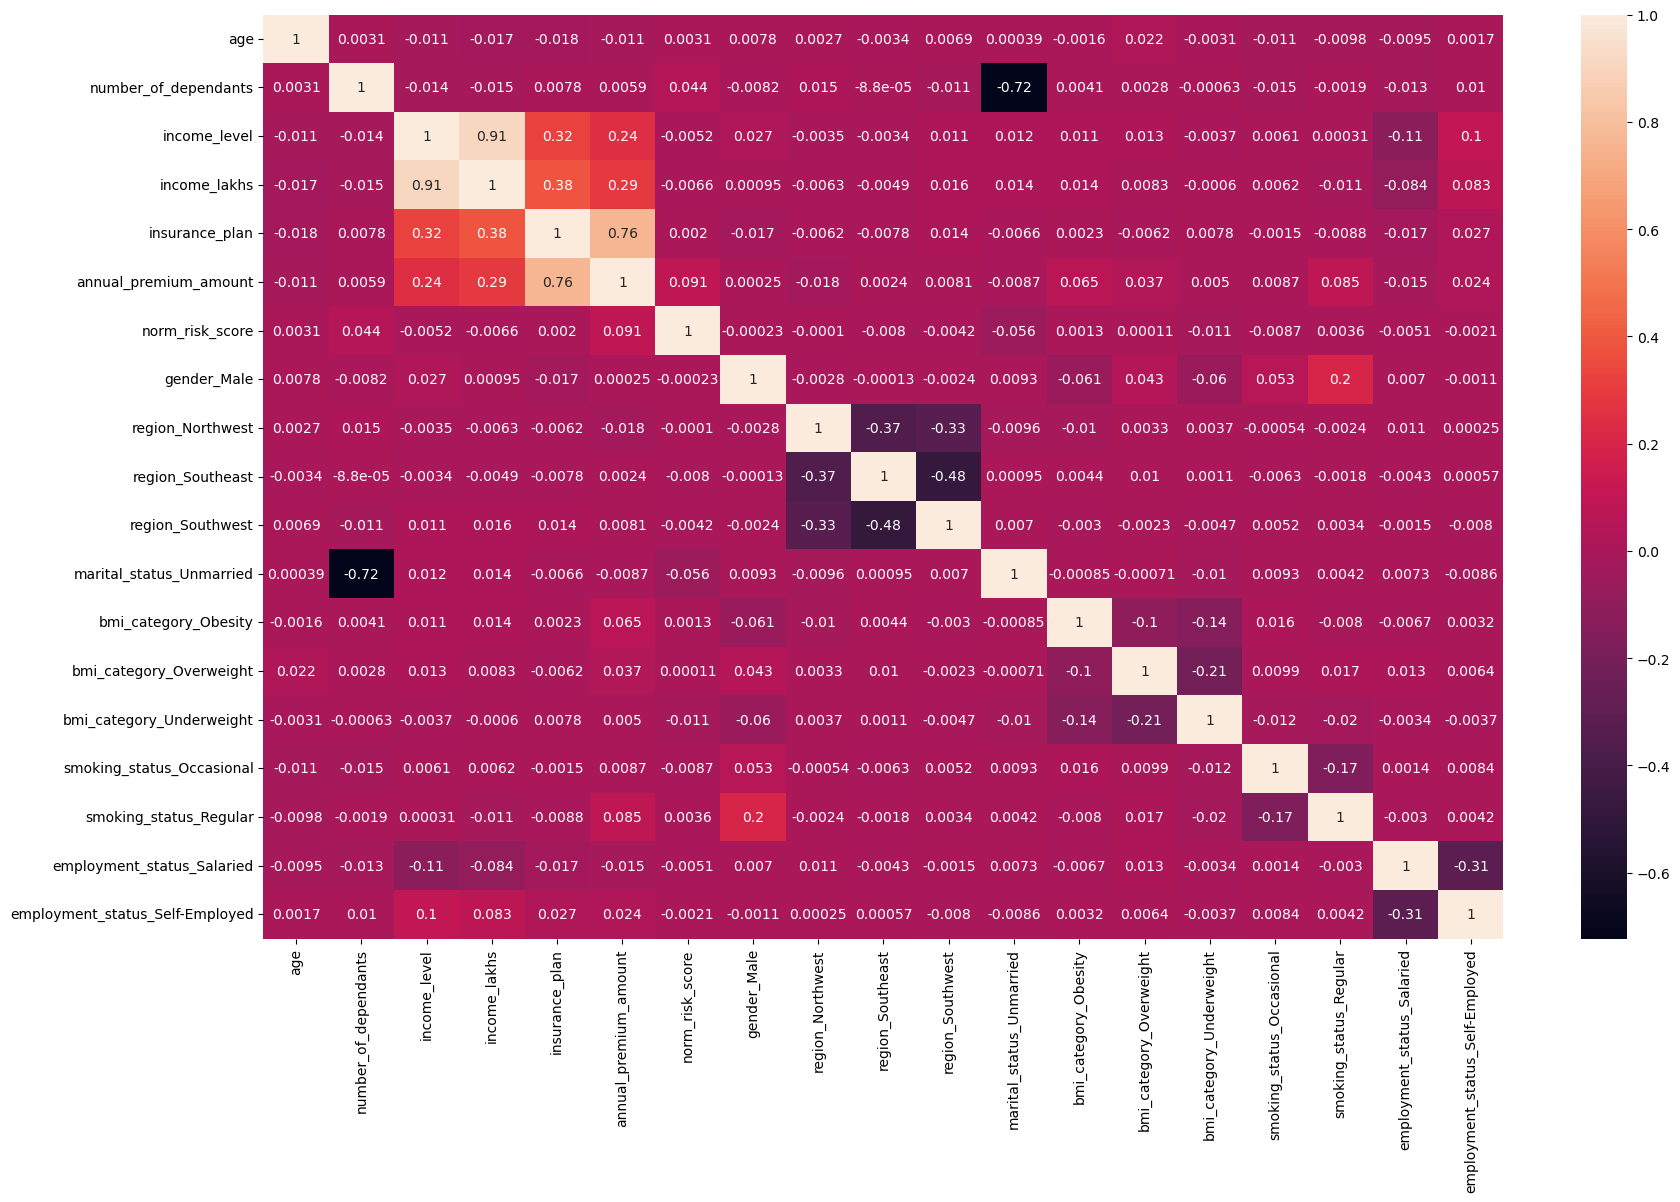

In [94]:
plt.figure(figsize = (20,12))
sns.heatmap(cm,annot = True)
plt.show()

In [95]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'norm_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [96]:
X = df3.drop(columns = 'annual_premium_amount')
y = df3['annual_premium_amount']

In [97]:
# scaling the features before using vif for feature selection

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs','insurance_plan']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [100]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [101]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
def get_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data,i) for i in range(data.shape[1])]
    return vif_df

In [104]:
get_vif(X)

,Column,VIF
0,age,3.142881
1,number_of_dependants,1.860761
2,income_level,11.928707
3,income_lakhs,11.874242
4,insurance_plan,1.592892
5,norm_risk_score,1.154223
6,gender_Male,2.310023
7,region_Northwest,2.147701
8,region_Southeast,2.970188
9,region_Southwest,2.730503


In [105]:
# as we can see here, income level and income lakhs have vif> 10
# remove feature iteratively and not in a bunch

In [106]:
get_vif(X.drop(columns = 'income_level'))

,Column,VIF
0,age,3.141534
1,number_of_dependants,1.858110
2,income_lakhs,2.291873
3,insurance_plan,1.587794
4,norm_risk_score,1.154174
5,gender_Male,2.299848
6,region_Northwest,2.146767
7,region_Southeast,2.968993
8,region_Southwest,2.729813
9,marital_status_Unmarried,7.299818


In [107]:
# as we can see now the vif are well below 5, we need not remove any other features

In [108]:
X_reduced = X.drop(columns = 'income_level')

In [109]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Model Training

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [111]:
X_train,X_test, y_train,y_test = train_test_split(X_reduced,y,test_size = .3,random_state = 3)

In [112]:
print(X_train.shape)
print(X_test.shape)

(14060, 17)
(6026, 17)


In [113]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [114]:
lr_model.score(X_test,y_test)

0.6074128208561153

In [115]:
#to check overfitting lets see score on train as well

In [116]:
lr_model.score(X_train,y_train)

0.6010879490376958

In [117]:
# these are almost same, so our model is not overfitting

In [122]:
# as we can see, the performance has dropped drastically from age>25 group. it was expected from our observation

In [123]:
lr_model.coef_

array([ 1.12339369e+01, -1.08507597e+02, -6.55391576e+00,  6.99437919e+03,
        1.07665941e+03, -2.48914549e+01, -1.08007872e+02, -7.75207570e+00,
       -3.79054608e+01, -1.00187286e+02,  8.06771235e+02,  4.28339446e+02,
        1.64017829e+02,  2.49634205e+02,  6.39011898e+02,  5.39827508e+00,
        3.14921358e+01])

In [124]:
lr_model_coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coef': lr_model.coef_})

In [125]:
lr_model_coef_df

,Feature,Coef
0,age,11.233937
1,number_of_dependants,-108.507597
2,income_lakhs,-6.553916
3,insurance_plan,6994.379194
4,norm_risk_score,1076.659408
5,gender_Male,-24.891455
6,region_Northwest,-108.007872
7,region_Southeast,-7.752076
8,region_Southwest,-37.905461
9,marital_status_Unmarried,-100.187286


<Axes: xlabel='Feature'>

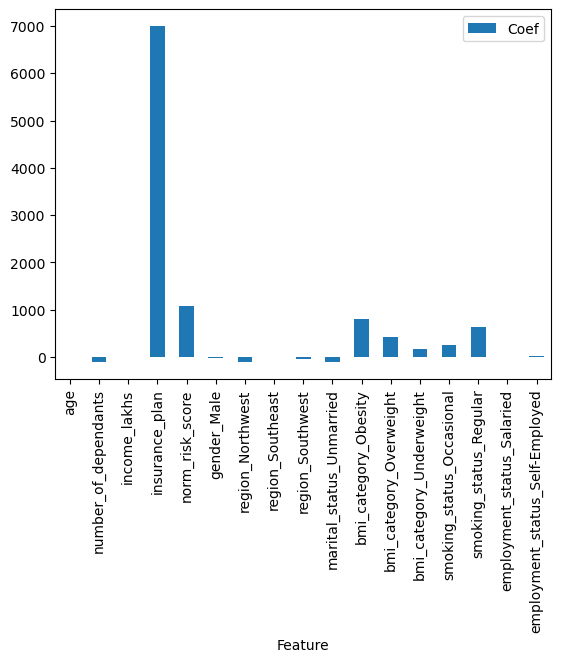

In [126]:
lr_model_coef_df.plot(x = 'Feature',kind= 'bar')

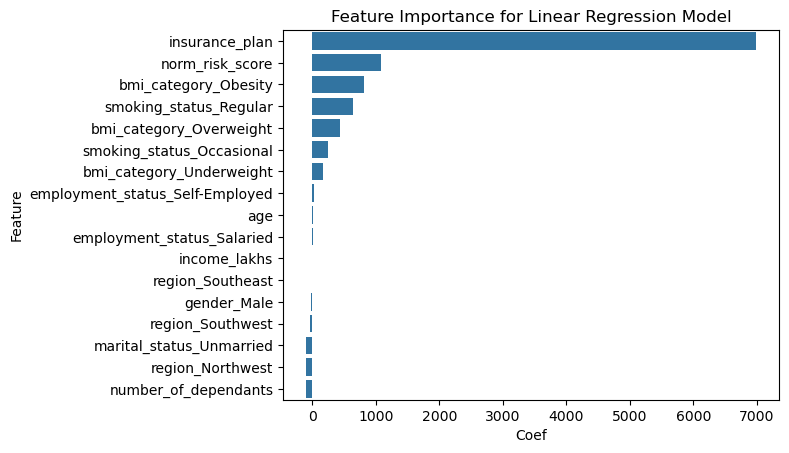

In [127]:
sns.barplot(data = lr_model_coef_df.sort_values(by = 'Coef',ascending = False),y = 'Feature',x = 'Coef')
plt.title('Feature Importance for Linear Regression Model')
plt.show()

from sklearn.linear_model import Ridge, Lasso

In [128]:
rg_model = Ridge()
rg_model.fit(X_train,y_train)
rg_model.score(X_test,y_test)

0.6074209829725241

In [129]:
ls_model = Lasso()
ls_model.fit(X_train,y_train)
ls_model.score(X_test,y_test)

0.6075361723515063

In [131]:
xg_model = XGBRegressor()

In [132]:
xg_model.fit(X_train,y_train)
xg_model.score(X_test,y_test)

0.5685282349586487

In [133]:
xg_model.score(X_train,y_train)

0.7230467796325684

In [134]:
y_lr_pred = lr_model.predict(X_test)
y_xg_pred = xg_model.predict(X_test)

In [135]:
print(f'Log Reg r2 = {r2_score(y_test,y_lr_pred)}, rmse = {root_mean_squared_error(y_test,y_lr_pred)}')
print(f'XGBoost r2 = {r2_score(y_test,y_xg_pred)}, rmse = {root_mean_squared_error(y_test,y_xg_pred)}')


Log Reg r2 = 0.6074128208561153, rmse = 1732.4144212347915
XGBoost r2 = 0.5685282349586487, rmse = 1816.1843308666594


### Hyperparameter Tuning

In [136]:
param_grid = {'n_estimators': [20,40,50],
             'learning_rate': [.01,.1,.2],
             'max_depth': [3,4,5]}
random_search = RandomizedSearchCV(XGBRegressor(),param_grid,n_iter = 10,cv = 3,scoring = 'r2')
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [20, 40, 50]},
                   scoring='r2')

In [137]:
random_search.best_score_

0.5975852211316427

In [138]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 3, 'learning_rate': 0.2}

In [139]:
# Since it is giving simlar scores as Linear Regression so we will go with Linear Regression because it is easier to interpret and simple 

In [140]:
best_model = lr_model

### Error Analysis

In [142]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

In [143]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

In [144]:
results_df.head()

,actual,predicted,diff,diff_pct
11665,4665,7142.122734,2477.122734,53.100166
1312,9017,10428.562893,1411.562893,15.654463
15320,6861,7554.232410,693.232410,10.103956
20069,9682,10403.728863,721.728863,7.454337
7755,6121,6363.184533,242.184533,3.956617


In [145]:
results_df.describe()

,actual,predicted,diff,diff_pct
count,6026.000000,6026.000000,6026.000000,6026.000000
mean,8179.623465,8158.790385,-20.833080,5.582108
std,2765.156856,2170.256767,1732.432905,26.588591
min,3503.000000,6319.267978,-3562.560160,-33.511054
25%,6081.250000,6587.906130,-1536.976889,-15.885687
50%,7951.000000,7105.962683,-53.841001,-0.638417
75%,9592.750000,9992.415530,1479.683514,22.132366
max,18186.000000,15433.662724,3168.028401,86.219105


In [146]:
# As we can see, the error percentage is as high as 86 percent. So our model is not performing very well

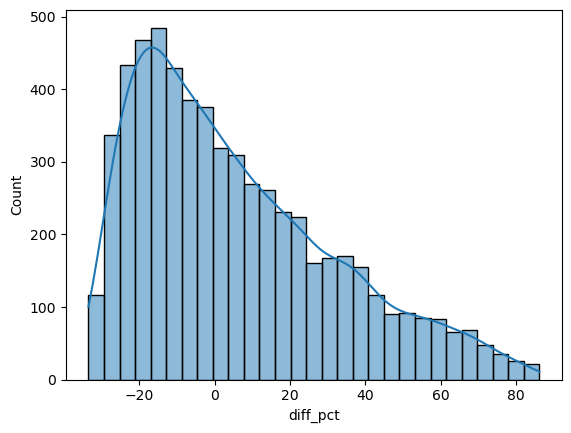

In [147]:
sns.histplot(results_df['diff_pct'],kde =True)
plt.show()

In [148]:
# After discussing with business, we came to a threshold of 10 percent. We have to try and contain the error within 10 percent'

In [149]:
extreme_error_threshold = 10
extreme_results_df = results_df[abs(results_df['diff_pct'])>extreme_error_threshold]

In [150]:
extreme_results_df.shape

(4362, 4)

In [151]:
results_df.shape

(6026, 4)

In [152]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

72.38632592100896

In [154]:
# So almost 72 percent of times our model is giving wrong answers which is more than 10 percent off from actual values

In [155]:
results_df[abs(results_df['diff_pct'])>50].shape

(501, 4)

In [156]:
# Almost 501 records have more than 50 % error

In [157]:
# We need to do some deeper analysis to find why are we getting such high error rates. 
#Is it specific to some feature (specific income group or age group etc) or something else

In [158]:
# we have results df, now we want to see original features for same, we can use index here

In [159]:
results_df.head()

,actual,predicted,diff,diff_pct
11665,4665,7142.122734,2477.122734,53.100166
1312,9017,10428.562893,1411.562893,15.654463
15320,6861,7554.232410,693.232410,10.103956
20069,9682,10403.728863,721.728863,7.454337
7755,6121,6363.184533,242.184533,3.956617


In [160]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
11665,1.000000,0.000000,0.232323,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,1
1312,1.000000,0.000000,0.060606,0.5,0.0,0,0,0,1,1,0,1,0,0,0,1,0
15320,0.142857,0.000000,0.232323,0.0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
20069,0.571429,0.000000,0.050505,0.5,0.0,0,0,0,1,1,0,0,1,1,0,0,0
7755,0.285714,0.333333,0.161616,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0


In [161]:
req_index = extreme_results_df.index
extreme_errors_df = X_test.loc[req_index]

In [162]:
extreme_errors_df.shape

(4362, 17)

In [163]:
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
11665,1.000000,0.000000,0.232323,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,1
1312,1.000000,0.000000,0.060606,0.5,0.0,0,0,0,1,1,0,1,0,0,0,1,0
15320,0.142857,0.000000,0.232323,0.0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
19526,0.571429,0.333333,0.151515,0.0,0.0,1,1,0,0,1,0,1,0,1,0,1,0
5979,0.714286,0.000000,0.202020,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0


In [164]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
11665,1.000000,0.000000,0.232323,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,1
1312,1.000000,0.000000,0.060606,0.5,0.0,0,0,0,1,1,0,1,0,0,0,1,0
15320,0.142857,0.000000,0.232323,0.0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
20069,0.571429,0.000000,0.050505,0.5,0.0,0,0,0,1,1,0,0,1,1,0,0,0
7755,0.285714,0.333333,0.161616,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0


<Axes: xlabel='income_lakhs', ylabel='Count'>

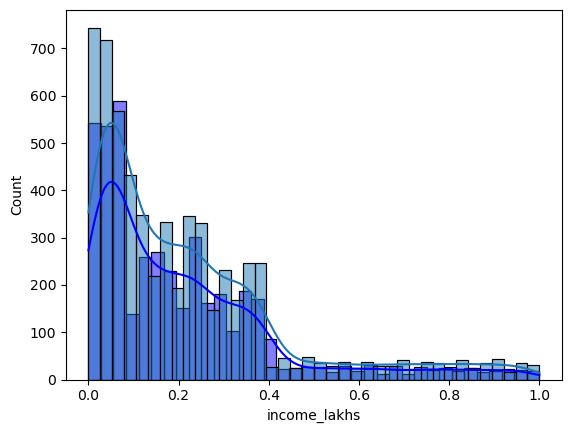

In [165]:
sns.histplot(extreme_errors_df['income_lakhs'],kde = True,color = 'blue')
sns.histplot(X_test['income_lakhs'],kde = True)

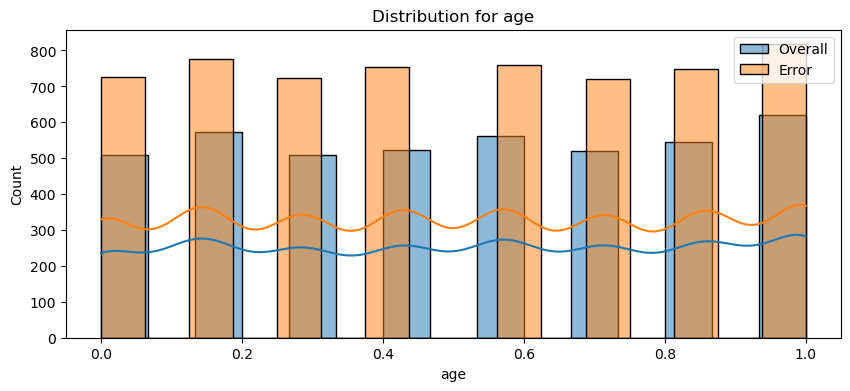

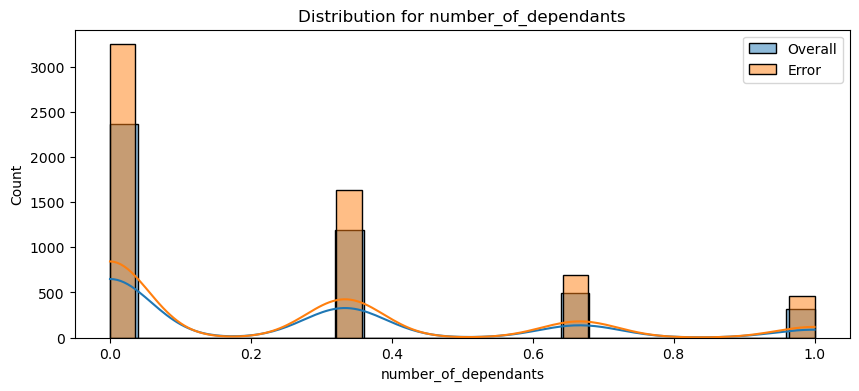

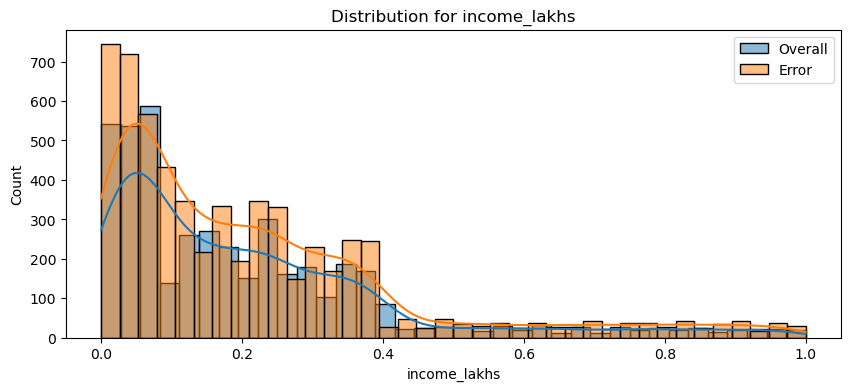

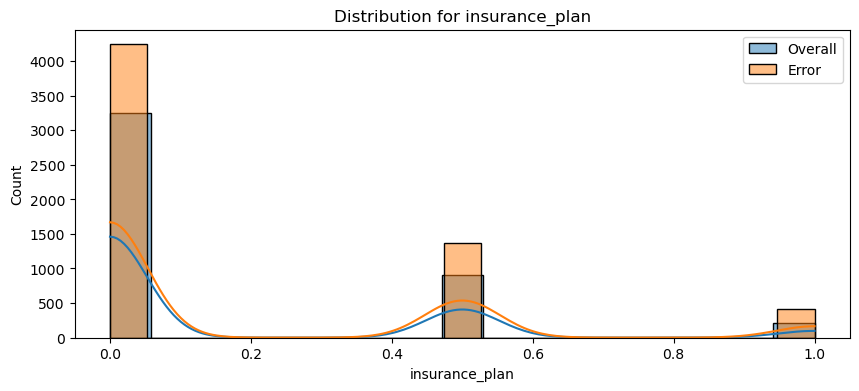

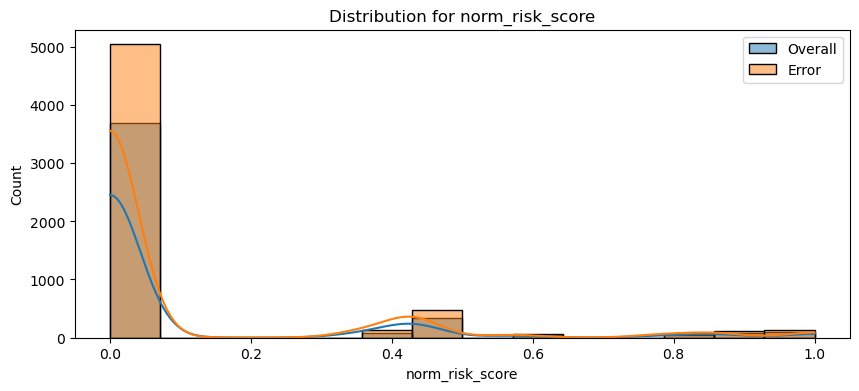

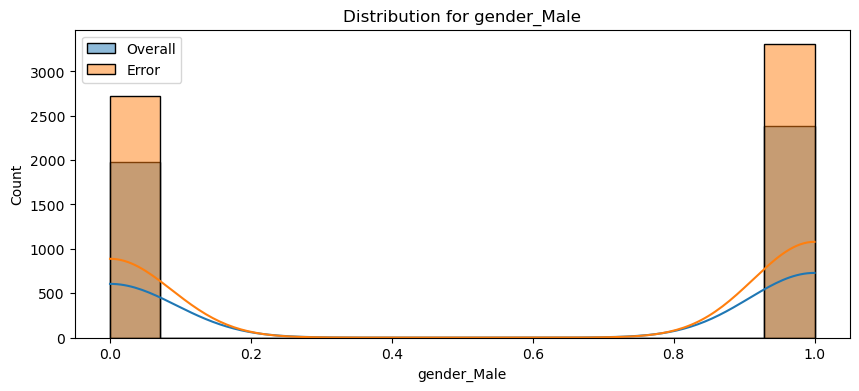

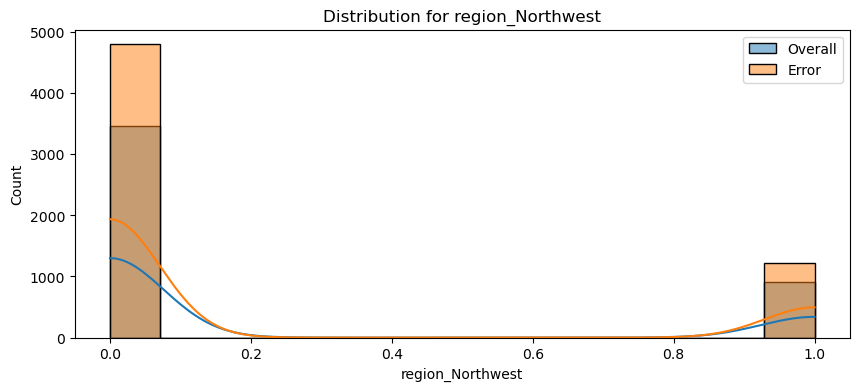

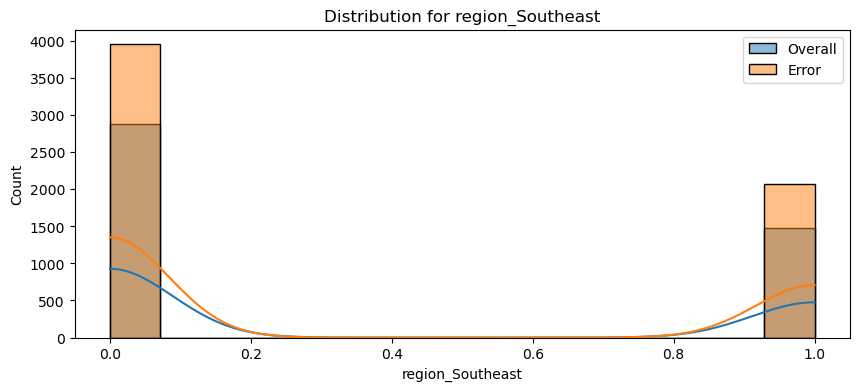

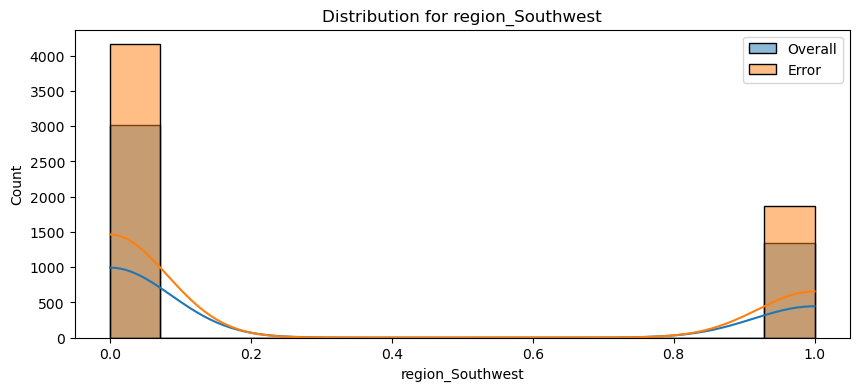

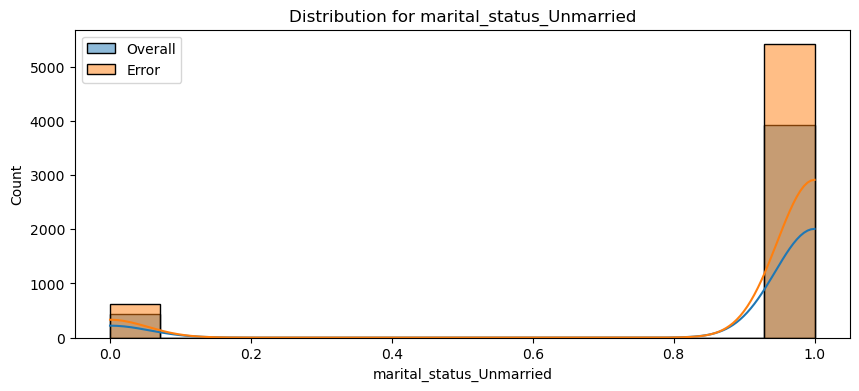

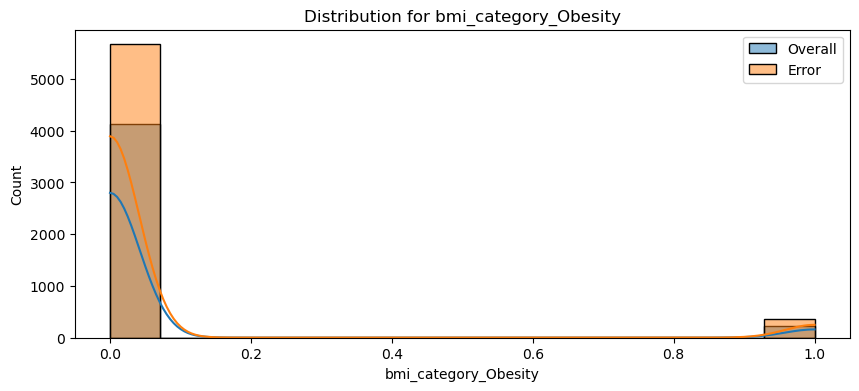

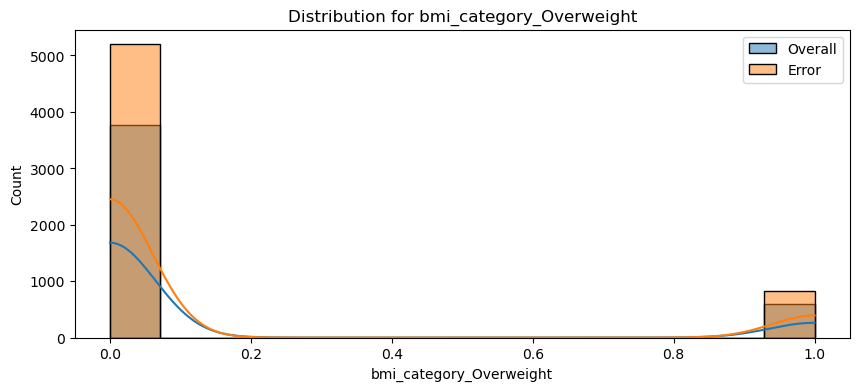

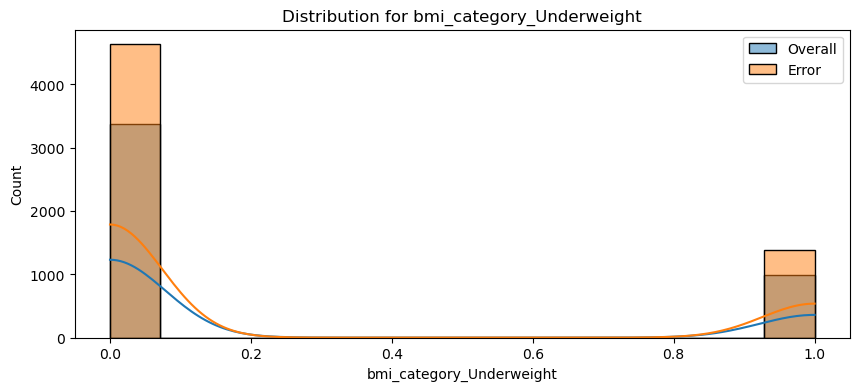

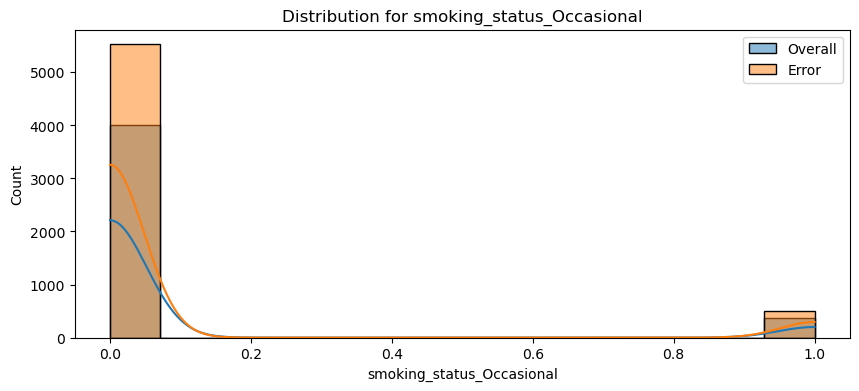

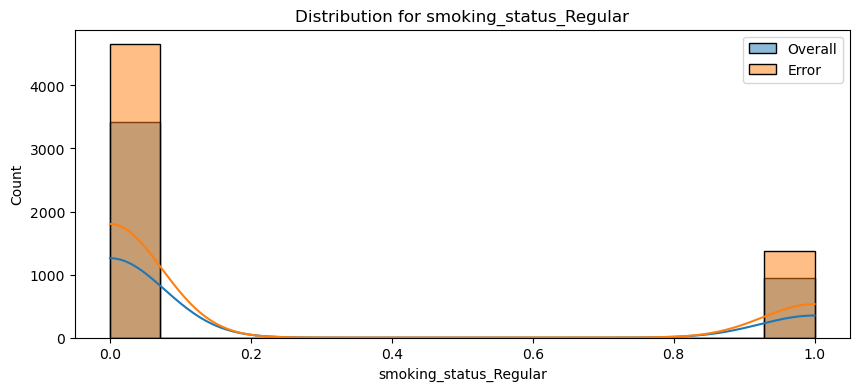

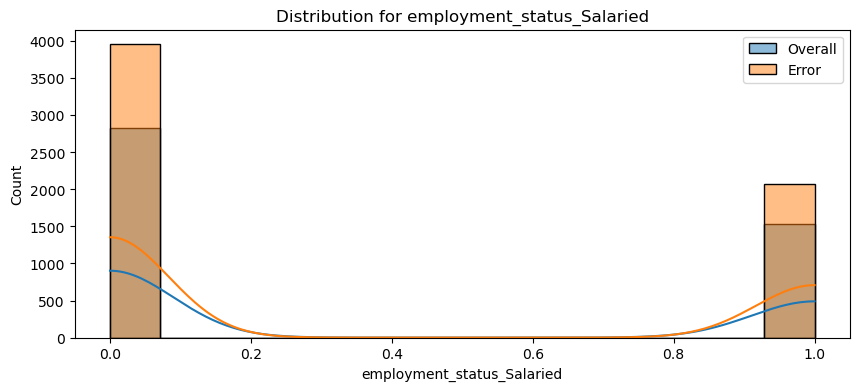

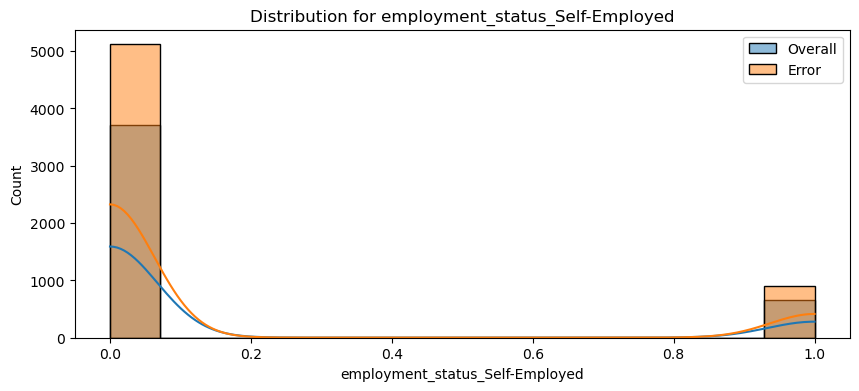

In [166]:
for feature in extreme_errors_df.columns:
    plt.figure(figsize = (10,4))
    sns.histplot(extreme_errors_df[feature],kde = True,label = 'Overall')
    sns.histplot(X_test[feature],kde = True,label = 'Error')
    plt.title(f'Distribution for {feature}')
    plt.legend()
    plt.show()

In [167]:
# As we can see, for all features the shapes of distribution for X_test, errors are almost same 
# which means errors are distributed as they should be

In [169]:
# Now to get to better scores we can ask business to provide more data, because current data is unable to explain the variability in the target variable

In [171]:
#or we can also try different feature engineering technique
# but here lets ask business for more data

In [172]:
# After discussing with business, we came up with a plan that if we could get some data regarding 
# their life style, genetical risk, past insurance claims then we can train the model better

In [173]:
# After some discussions, the business could provide us genetical risk data